In [1]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
def cond(A):
    return linalg.norm(A, 1)*linalg.norm(linalg.inv(A), 1)
max=200
n_vector = np.arange(1, max+1)

Построим график зависимости числа обусловленности от порядка матрицы со случайными элементами, которые распределенны по нормальному закону с математическим ожиданием 0 и средним квадратическим отклонением 1.

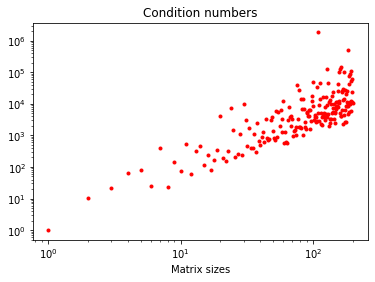

In [2]:
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))
plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
plt.loglog(n_vector,cond_array,'.',c="red")
pass

Большинство лежат между двумя прямыми. Прямые являются графиками показательных функций от n. В среднем, cond1An растет как показательная функция от n. Подберем такие c1, c2, p, что для большинства матриц c1n^p <= cond1An <= c2n^p

Коэффициенты c1 и c2 отвечают за смещение прямых вдоль оси ординат, p - за угол наклона.


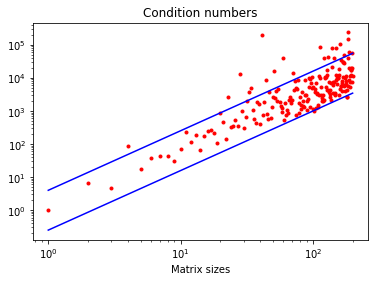

In [4]:
c1=4
c2=0.25
p=1.8
l1=c1*(n_vector**p)
l2=c2*(n_vector**p)
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))  
    
mx = n_vector.sum()/max
my = A.sum()/max
a1 = np.dot(n_vector.T, n_vector)/max
a2 = np.dot(n_vector.T, cond_array)/max
C1 = (a2 - mx*my)/(a1 - mx**2)
C2 = my - C1*mx
L1=C1*(n_vector**p)
L2=C2*(n_vector**p)

plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
plt.loglog(n_vector,cond_array,'.',c="red")
plt.loglog(n_vector,l1,c="blue")
plt.loglog(n_vector,l2,c="blue")

pass

Выводы:

Мы выяснили, что cond1An в среднем растет как показательная функция от n.

Если c1 = c2 = 1, прямые будут проходить через центр скопления. Следовательно, в среднем, cond1An растет как функция n^2 (p=1.8). Итоговые значения параметров c1 и c2 соответственно в k раз больше и меньше 1, где k = 4.